## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged = mouse_metadata.merge(study_results,on=["Mouse ID"])
# Display the data table for preview
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print("Unique mice: ", merged['Mouse ID'].nunique())

Unique mice:  249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
time_points=merged["Timepoint"].value_counts()
number_of_time_ID_appears=merged['Mouse ID'].value_counts()
number_of_time_ID_appears=number_of_time_ID_appears.reset_index()
# duplicate_mice
duplicate_mice_row=number_of_time_ID_appears.loc[number_of_time_ID_appears['Mouse ID']>len(time_points)]
duplicate_mice_ID=duplicate_mice_row.iloc[0,0]
duplicate_mice_ID

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data_for_duplicate_mice=merged.loc[merged['Mouse ID']==duplicate_mice_ID]
all_data_for_duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_clean=merged.loc[merged['Mouse ID']!=duplicate_mice_ID]
merged_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
print("Unique mice: ", merged['Mouse ID'].nunique())

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Mean_Tumor_Volume=merged_clean.groupby('Drug Regimen').mean().iloc[:,1]
Median_Tumor_Volume=merged_clean.groupby('Drug Regimen').median().iloc[:,1]
Std_Tumor_Volume=merged_clean.groupby('Drug Regimen').std().iloc[:,1]
Var_Tumor_Volume=merged_clean.groupby('Drug Regimen').var().iloc[:,1]
SEM_Tumor_Volume=merged_clean.groupby('Drug Regimen').sem().iloc[:,4]

# This method is the most straighforward, creating multiple series and putting them all together at the end.

Summary_Statistics_table=pd.DataFrame({
                          'Mean':Mean_Tumor_Volume,
                          'Median':Median_Tumor_Volume,
                          'Variance':Var_Tumor_Volume,
                          'Std':Std_Tumor_Volume,
                          'SEM':SEM_Tumor_Volume})

Summary_Statistics_table

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,19.965217,20.5,7.466034,2.732404,0.055981
Ceftamin,27.398876,28.0,2.501016,1.581460,0.088766
Infubinol,27.196629,27.0,4.769028,2.183810,0.076985
Ketapril,27.861702,28.0,3.392536,1.841884,0.101659
Naftisol,27.166667,27.0,2.247748,1.499249,0.089200
Placebo,27.928177,28.0,3.378146,1.837973,0.099514
Propriva,27.135135,26.0,2.933995,1.712891,0.090952
Ramicane,19.679825,19.0,10.465318,3.235014,0.045780
Stelasyn,27.856354,28.0,2.701473,1.643616,0.072252


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
single_summary_statistics_table=merged_clean.groupby("Drug Regimen").describe().iloc[:,8:15]
single_summary_statistics_table
# Using the aggregation method, produce the same summary statistics in a single line

Weight (g)                                             
                  count       mean       std   min   25%   50%   75%
Drug Regimen                                                        
Capomulin         230.0  19.965217  2.732404  15.0  17.0  20.5  22.0
Ceftamin          178.0  27.398876  1.581460  25.0  26.0  28.0  28.0
Infubinol         178.0  27.196629  2.183810  23.0  25.0  27.0  29.0
Ketapril          188.0  27.861702  1.841884  25.0  26.0  28.0  30.0
Naftisol          186.0  27.166667  1.499249  25.0  26.0  27.0  28.0
Placebo           181.0  27.928177  1.837973  25.0  27.0  28.0  30.0
Propriva          148.0  27.135135  1.712891  25.0  26.0  26.0  29.0
Ramicane          228.0  19.679825  3.235014  16.0  17.0  19.0  22.0
Stelasyn          181.0  27.856354  1.643616  25.0  27.0  28.0  29.0
Zoniferol         182.0  27.692308  1.419612  25.0  27.0  28.0  29.0

## Bar and Pie Charts

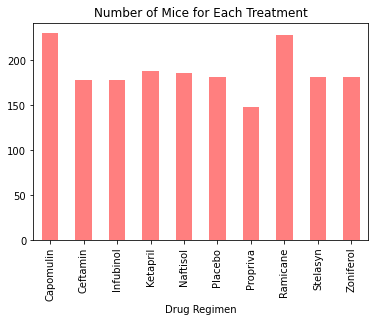

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
number_of_mice_per_treatment=single_summary_statistics_table.iloc[:,0]
number_of_mice_per_treatment.plot(kind='bar',title='Number of Mice for Each Treatment',color='r',alpha=.5)
plt.show()

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



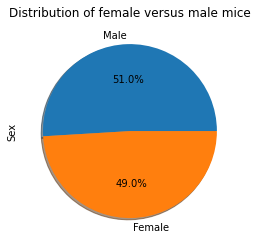

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female=merged_clean['Sex'].value_counts()
male_female.plot(kind='pie',autopct='%1.1f%%',title='Distribution of female versus male mice',shadow=True)
plt.show()

ValueError: x must be 1D

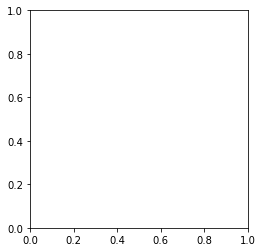

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female=merged_clean['Sex'].value_counts()

labels = male_female.reset_index().iloc[:,0]

# The values of each section of the pie chart
sizes = [male_female.reset_index().iloc[:,1]]
colors = ["red",'coral']
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
